In [3]:
%matplotlib inline
from SALib.sample import saltelli

# mesa tools import
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [9]:
data = []
for i in range(2):
    data.append(pd.DataFrame())
    for name in ["Thijs", "Rina", "Liza", "Mercylyn", "Tamara"]:
        data[i] = data[i].append(pd.read_csv(f"data/samples_{name}_{i+1}.csv"))

In [31]:
# sobol analysis module
problem = {
    'num_vars': 4,
    'names': ['max_speed', 'vision', 'soc_strength', 'obs_strength'],
    'bounds': [[3, 5], [1, 5], [1000, 3000], [2000, 5000]]
}

def plot_index(s, params, i, title='', col='blue'):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
        col(str): color for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o', color = col)
    plt.axvline(0, c='k')
    if i == '1':
        plt.savefig(f'SA_Data/sobol_plot_S1{title}.jpg')
    else:
        plt.savefig(f'SA_Data/sobol_plot_ST{title}.jpg')

def plot_first_and_all_order(problem,Si_var,title,color):
    
    # First order
    plot_index(Si_var, problem['names'], '1', f'First order sensitivity for {title}',color)
    plt.show()
    

    # Total order
    plot_index(Si_var, problem['names'], 'T', f'Total order sensitivity for {title}',color)
    plt.show()

def sobol_analysis(data):
    """ Sobol Analysis for one repetition of data """
    Si_mean_exit_time = sobol.analyze(problem, data['Mean exit time'].values,  calc_second_order=False, print_to_console=False)
    # Si_std_exit_time = sobol.analyze(problem, data['std exit time'].values,  calc_second_order=False, print_to_console=False)
    Si_flow = sobol.analyze(problem, data['Flow'].values, calc_second_order=False, print_to_console=False)
    # Si_eva_prec = sobol.analyze(problem, data['Evacuation percentage'].values, calc_second_order=False, print_to_console=False)
    Si_eva_time = sobol.analyze(problem, data['Evacuation time'].values, calc_second_order=False, print_to_console=False)

    measures = [Si_mean_exit_time,Si_flow,Si_eva_time]
    name_measures = ['Mean exit time','Flow','Evacuation time']
    colors = ['red','blue','green']

    for i, Si_var in enumerate(measures):
        print(name_measures[i])
        print('\n')
        print(Si_var)
        plot_first_and_all_order(problem,Si_var,name_measures[i],colors[i])



Mean exit time


{'S1': array([0.06798677, 0.09344295, 0.04654956, 0.2429011 ]), 'S1_conf': array([0.11312996, 0.10963439, 0.11501921, 0.14517678]), 'ST': array([0.72028857, 0.79342668, 0.92550541, 0.80977561]), 'ST_conf': array([0.10780856, 0.1381171 , 0.15433126, 0.14210992])}


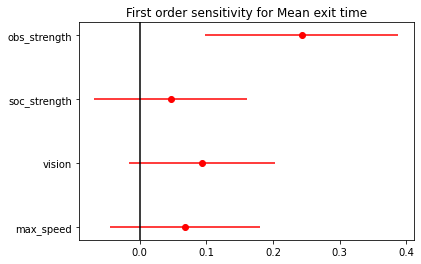

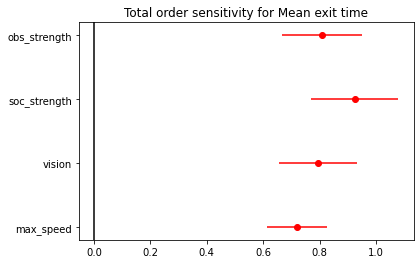

Flow


{'S1': array([ 3.61720052e-05, -1.33660261e-02,  8.13425847e-03,  1.37550226e-01]), 'S1_conf': array([0.1079914 , 0.11506268, 0.12048518, 0.11883962]), 'ST': array([0.7057304 , 0.77857517, 0.84981842, 0.80228411]), 'ST_conf': array([0.09436656, 0.10214641, 0.11053845, 0.10075093])}


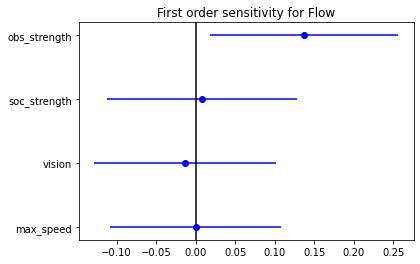

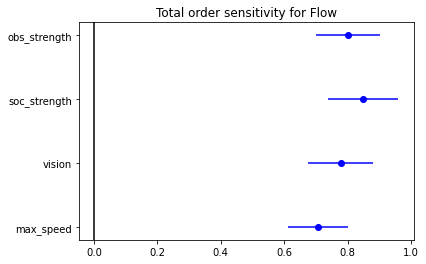

Evacuation time


{'S1': array([0.03799615, 0.01128803, 0.00307267, 0.16506321]), 'S1_conf': array([0.11474613, 0.10688588, 0.13619459, 0.12703944]), 'ST': array([0.72152489, 0.79748961, 0.88652415, 0.78586742]), 'ST_conf': array([0.12168368, 0.14692814, 0.13786709, 0.10723565])}


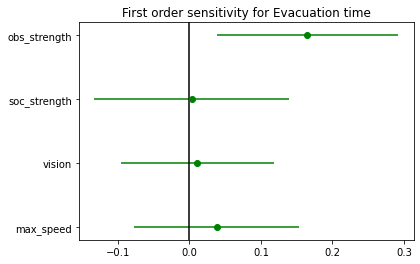

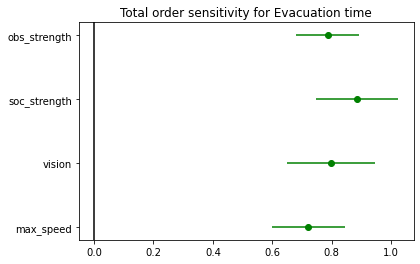

In [33]:
sobol_analysis(data[0])